In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error

In [25]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [26]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [27]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

In [28]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [29]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize as training & test
X = dt.loc[:, features] # X are the data we want to use from 'features'
y = dt.loc[:, ['response']] # y is the data we want to use as target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

In [30]:
X_train.head()

,f1,f2,f3,f4,f5
382,0.313926,-0.234823,-0.729167,0.346540,1.090577
994,0.683057,1.374748,-0.648920,-0.684629,-1.294978
982,0.274861,1.301189,-0.910695,-0.818175,0.220356
47,-2.186260,-1.040181,-1.212700,-0.094067,0.501085
521,-0.101881,-0.676446,0.829162,-0.131754,0.343234


In [31]:
alpha = 0.1 # Set learning rate to 0.25
max_epoch = 1500 # Set max iteration to 6000

-- Epoch 1
Norm: 1.61, NNZs: 5, Bias: 0.433758, T: 800, Avg. loss: 3.260719
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.71, NNZs: 5, Bias: 0.719484, T: 1600, Avg. loss: 3.152305
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 5, Bias: 0.969595, T: 2400, Avg. loss: 3.064299
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.55, NNZs: 5, Bias: 1.198604, T: 3200, Avg. loss: 2.985256
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.38, NNZs: 5, Bias: 1.416095, T: 4000, Avg. loss: 2.912019
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.16, NNZs: 5, Bias: 1.622859, T: 4800, Avg. loss: 2.842970
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.91, NNZs: 5, Bias: 1.820289, T: 5600, Avg. loss: 2.777108
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.64, NNZs: 5, Bias: 2.010419, T: 6400, Avg. loss: 2.713805
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.34, NNZs: 5, Bias: 2.196651, T: 7200, Avg. loss: 2.652640
Total training time: 0.00 se

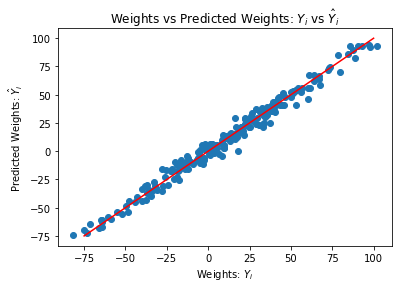

In [32]:
# Define function train model
#--------------------------------------------------------------------------------------------------------
# This function returns w as estimated weights in a form of array, and hist_loss
#   to display training loss value for each epoch of the training loop
def train_model(X, y, alpha, max_epoch):
    from sklearn.linear_model import SGDRegressor
    reg_gd = SGDRegressor(loss='huber', eta0=alpha, max_iter=max_epoch, early_stopping=False, tol=None, verbose=1, random_state=1)
    hist_loss = reg_gd.fit(X_train, y_train.values.ravel())
    w = reg_gd.predict(X_test)

    #----- This is for plotting the line
    plt.scatter(y_test, w)
    plt.xlabel('Weights: $Y_i$')
    plt.ylabel('Predicted Weights: $\hat{Y}_i$')
    plt.title('Weights vs Predicted Weights: $Y_i$ vs $\hat{Y}_i$')
    ## plot a line, a perfect prediction would all fall on this line
    x = np.linspace(-75, 100, 100)
    y = x
    plott = plt.plot(x, y, 'r')
    #-----------------------------------

    return hist_loss, w; # return values as tuples
hist_loss, w = train_model(X, y, alpha, max_epoch)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, w))
print(mean_squared_error(y_test, w))
print(r2_score(y_test, w))

4.086102244811458
26.376742560403155
0.9828152985095938


In [34]:
#--------------------------------------------------------------------------------

In [35]:
# Start of 2nd function -> Wang Yan


In [36]:
w_list = pd.DataFrame(w, columns=['Predicted Weights'])
w_list

,Predicted Weights
0,2.825055
1,54.559484
2,6.428860
3,-45.038964
4,-10.700889
...,...
195,58.790667
196,54.426512
197,-30.808923
198,92.873504


In [37]:
#--------------------------------------------------------------------------------

In [38]:
# Start of 2nd function -> Wang Yan
